# Titanic - Machine Learning from Disasster

In [254]:
# Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning and Pre-processing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Possible models used for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metrics used for judging the models
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [255]:
df = pd.read_csv('../Datasets/titanic.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [256]:
X = df.drop(['Survived'], axis = 1)
y = df['Survived']

In [257]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [258]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 22)

print('Shape of the dataset before split:', df.shape)
print('Shape of the dataset after spliting it into train and test: Train = {}, Test = {}'.format(train_X.shape, test_X.shape))

Shape of the dataset before split: (891, 12)
Shape of the dataset after spliting it into train and test: Train = (712, 11), Test = (179, 11)


In [259]:
# For performing EDA

train = pd.concat([train_X, train_y], axis = 1)
train.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
793,794,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C,0
814,815,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S,0
43,44,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,1
269,270,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S,1
538,539,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,0
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,0
468,469,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,0
543,544,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S,1
778,779,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q,0
500,501,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S,0


<AxesSubplot:>

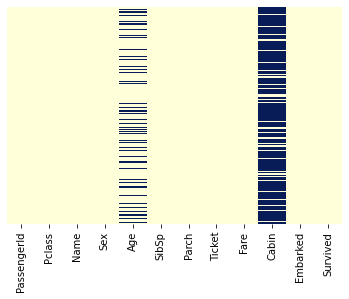

In [260]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [261]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 793 to 885
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          565 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        155 non-null    object 
 10  Embarked     711 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


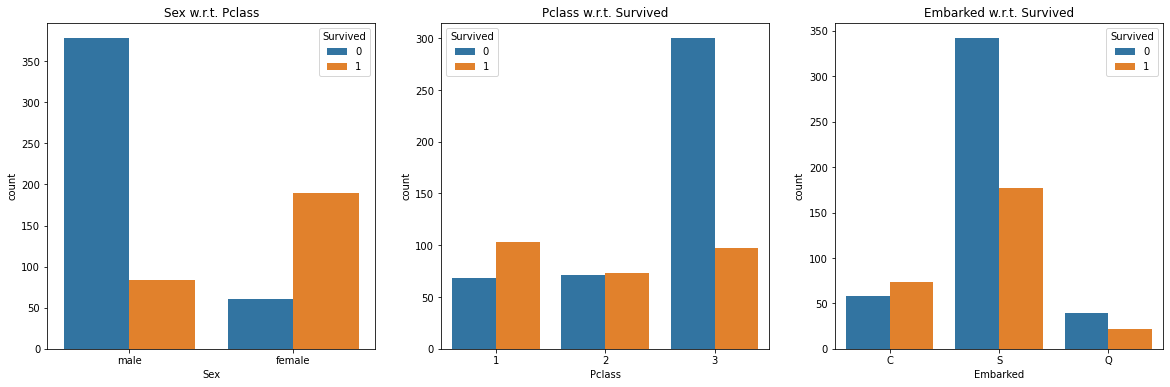

In [262]:
fig, ax = plt.subplots(1, 3, figsize = (20, 6))

sns.countplot(data = train, x = 'Sex', hue = 'Survived', ax = ax [0])
ax[0].set_title('Sex w.r.t. Pclass')

sns.countplot(data = train, x = 'Pclass', hue = 'Survived', ax = ax[1])
ax[1].set_title('Pclass w.r.t. Survived')

sns.countplot(data = train, x = 'Embarked', hue = 'Survived', ax = ax[2])
ax[2].set_title('Embarked w.r.t. Survived')


plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

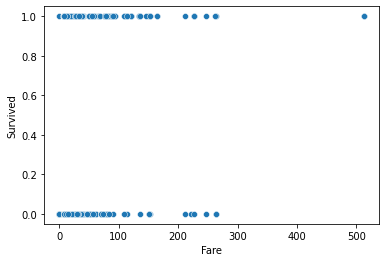

In [263]:
sns.scatterplot(data = train, x = 'Fare', y = 'Survived')

In [264]:
#Dropping columns 

train_X.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True)

In [265]:
train_X.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
793,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,30.6958,NaN,C
814,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,8.0500,NaN,S
43,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,41.5792,NaN,C
269,1,"Bissette, Miss. Amelia",female,35.0,0,0,135.6333,C99,S
538,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,14.5000,NaN,S
890,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.7500,NaN,Q
468,3,"Scanlan, Mr. James",male,NaN,0,0,7.7250,NaN,Q
543,2,"Beane, Mr. Edward",male,32.0,1,0,26.0000,NaN,S
778,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,7.7375,NaN,Q
500,3,"Calic, Mr. Petar",male,17.0,0,0,8.6625,NaN,S


<AxesSubplot:ylabel='Age'>

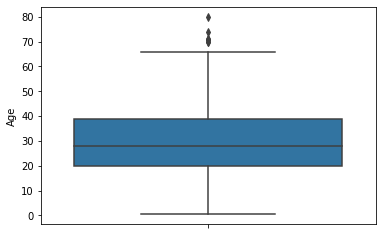

In [266]:
sns.boxplot(data = train, y = 'Age')

In [267]:
num_impute = SimpleImputer(strategy = 'median')
num_col = [col for col in train_X.columns if train_X[col].dtype != 'O']


In [268]:
#Dealing with Age column

train_X_num = train_X[num_col]
imputed_data = num_impute.fit_transform(train_X_num)  # impute all the missing data
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = train_X_num.columns
train_X[num_col] = df_temp[num_col].values

In [269]:
#Dealing with Name column

def extract_title(person_name):
    b_index = person_name.find(',')
    e_index = person_name.find('.')
    
    return person_name[b_index+2:e_index]

train_X['Title'] = train_X['Name'].apply(extract_title)

not_unique_acceptable_title = ['Mr', 'Mrs', 'Master', 'Miss']
unique_title_list = [title for title in list(train_X.Title.unique()) if title not in not_unique_acceptable_title]

def title_engg(dataset):
    dataset = dataset.replace('Ms', 'Miss')
    dataset = dataset.replace(unique_title_list, 'Unique')

    return dataset

In [270]:
train_X = train_X.apply(title_engg)
train_X.drop('Name', axis = 1, inplace = True)

In [271]:
train_X.Cabin.unique()

array([nan, 'C99', 'E44', 'D36', 'A19', 'F33', 'C126', 'C70', 'B3', 'A26',
       'B28', 'A7', 'B4', 'C124', 'C91', 'C118', 'E40', 'D56', 'C68',
       'D33', 'D26', 'A14', 'C23 C25 C27', 'E34', 'B71', 'E38', 'F2',
       'D15', 'B101', 'A10', 'E121', 'D48', 'B94', 'C83', 'A16', 'C46',
       'E36', 'C78', 'B73', 'C123', 'E67', 'C22 C26', 'E50', 'T', 'C95',
       'D20', 'A24', 'F G63', 'A36', 'C101', 'D49', 'C47', 'B86', 'C125',
       'D30', 'B18', 'C103', 'D28', 'G6', 'B96 B98', 'C93', 'C111', 'F4',
       'E10', 'D17', 'C62 C64', 'C52', 'E31', 'D46', 'C32', 'A6', 'B102',
       'F G73', 'E17', 'D19', 'B30', 'B80', 'E101', 'D', 'C50', 'D7',
       'C110', 'E49', 'B58 B60', 'C65', 'E8', 'C45', 'D37', 'D45', 'C92',
       'F38', 'D21', 'B41', 'E25', 'C2', 'B20', 'B19', 'C82', 'C87',
       'E46', 'C30', 'B77', 'B22', 'B38', 'A23', 'D6', 'E24', 'B49',
       'C106', 'B57 B59 B63 B66', 'C90', 'E77', 'B51 B53 B55', 'E12',
       'C7', 'A34', 'E63', 'A5', 'D9', 'B69', 'B35', 'D50', 'D11',

In [272]:
# Dealing with Cabin column

train_X.Cabin = train_X.Cabin.fillna('Missing')
Cabin_list = list(train_X.Cabin.unique())
Cabin_list.remove('Missing')
train_X = train_X.replace(Cabin_list,'Available')

train_X['Cabin'].unique()

array(['Missing', 'Available'], dtype=object)

In [273]:
# Dealing with missing Embarked value

embarked_impute = 'S' # Using the most-common value in the training set for imputing

train_X['Embarked'] = train_X['Embarked'].fillna(embarked_impute)

In [274]:
train_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
793,1.0,male,28.0,0.0,0.0,30.6958,Missing,C,Mr
814,3.0,male,30.5,0.0,0.0,8.0500,Missing,S,Mr
43,2.0,female,3.0,1.0,2.0,41.5792,Missing,C,Miss
269,1.0,female,35.0,0.0,0.0,135.6333,Available,S,Miss
538,3.0,male,28.0,0.0,0.0,14.5000,Missing,S,Mr


In [275]:
cat_col = [col for col in train_X.columns if train_X[col].dtype == 'O']
print(cat_col)

['Sex', 'Cabin', 'Embarked', 'Title']


In [276]:
ohe = OneHotEncoder(drop = 'first', sparse = False)
oh_train = pd.DataFrame(ohe.fit_transform(train_X[cat_col]))
oh_train.index = train_X.index
train_X = train_X.drop(cat_col, axis = 1)
train_X  = pd.concat([train_X, oh_train], axis = 1)

In [277]:
train_X.head(10)

,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4,5,6,7
793,1.0,28.0,0.0,0.0,30.6958,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
814,3.0,30.5,0.0,0.0,8.0500,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
43,2.0,3.0,1.0,2.0,41.5792,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
269,1.0,35.0,0.0,0.0,135.6333,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
538,3.0,28.0,0.0,0.0,14.5000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
890,3.0,32.0,0.0,0.0,7.7500,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
468,3.0,28.0,0.0,0.0,7.7250,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
543,2.0,32.0,1.0,0.0,26.0000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
778,3.0,28.0,0.0,0.0,7.7375,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
500,3.0,17.0,0.0,0.0,8.6625,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [278]:
col_scale = ['Age', 'Fare']
scaler = MinMaxScaler()

scaled = scaler.fit_transform(train_X[col_scale])
scaled = pd.DataFrame(scaled, columns = col_scale)
scaled.index = train_X.index

train_X[col_scale] = scaled

In [279]:
train_X.head()

,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4,5,6,7
793,1.0,0.346569,0.0,0.0,0.059914,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
814,3.0,0.377984,0.0,0.0,0.015713,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
43,2.0,0.032420,1.0,2.0,0.081157,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
269,1.0,0.434531,0.0,0.0,0.264739,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
538,3.0,0.346569,0.0,0.0,0.028302,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


Applying all functions on testing data

In [280]:
test_X.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True)

test_X_num = test_X[num_col]
imputed_data = num_impute.transform(test_X_num)  # impute all the missing data
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = test_X_num.columns
test_X[num_col] = df_temp[num_col].values

test_X['Title'] = test_X['Name'].apply(extract_title)
unique_title_list = [title for title in list(test_X.Title.unique()) if title not in not_unique_acceptable_title]
test_X = test_X.apply(title_engg)
test_X.drop('Name', axis = 1, inplace = True)

test_X.Cabin = test_X.Cabin.fillna('Missing')
Cabin_list = list(test_X.Cabin.unique())
Cabin_list.remove('Missing')
test_X = test_X.replace(Cabin_list,'Available')

test_X['Embarked'] = test_X['Embarked'].fillna(embarked_impute)

oh_test = pd.DataFrame(ohe.transform(test_X[cat_col]))
oh_test.index = test_X.index
test_X = test_X.drop(cat_col, axis = 1)
test_X  = pd.concat([test_X, oh_test], axis = 1)

scaled = scaler.transform(test_X[col_scale])
scaled = pd.DataFrame(scaled, columns = col_scale)
scaled.index = test_X.index

test_X[col_scale] = scaled

test_X.head()

,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4,5,6,7
816,3.0,0.283740,0.0,0.0,0.015469,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
789,1.0,0.572757,0.0,0.0,0.154588,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
869,3.0,0.044986,1.0,1.0,0.021731,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
235,3.0,0.346569,0.0,0.0,0.014737,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
473,2.0,0.283740,0.0,0.0,0.026920,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


---
### Modelling

In [289]:
# Models
Model_score = {}

lr = LogisticRegression(random_state = 22)
dtc = DecisionTreeClassifier(random_state = 22)
gnb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
rfc = RandomForestClassifier()
xgbc = XGBClassifier()

In [290]:
lr.fit(train_X, train_y)
pred = lr.predict(test_X)
accuracy = accuracy_score(test_y, pred)*100
Model_score['LogisticRegression'] = accuracy

print(classification_report(test_y, pred))
print(accuracy)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

79.88826815642457


In [ ]:
dtc.fit(train_X, train_y)
pred = lr.predict(test_X)
accuracy = accuracy_score(test_y, pred)*100
Model_score['DecisionTreeClassifier'] = accuracy

print(classification_report(test_y, pred))
print(accuracy)

In [283]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
pred = knn.predict(test_X)

print(classification_report(test_y, pred))
print(accuracy_score(test_y, pred)*100)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179

79.88826815642457


In [284]:
xgbc = XGBClassifier()
xgbc.fit(train_X, train_y)
pred = xgbc.predict(test_X)

print(classification_report(test_y, pred))
print(accuracy_score(test_y, pred)*100)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

80.44692737430168
